# Yapay Zeka Yöntemleri Proje 2

In [1]:
#!pip3 uninstall twint -y

In [2]:
#!pip3 install --user --upgrade git+https://github.com/twintproject/twint.git@origin/master

In [3]:
import twint   # Twint aracılığıyla veri çekme işlemleri gerçekleştirilecek

import nest_asyncio  # eventloop runtime error'unu önlemek için
nest_asyncio.apply()

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

import string        # tweetlerdeki noise'ı azaltmak için
import re
import os
import emoji

import warnings      # uyarı mesajlarını kaldırmak için
warnings.filterwarnings('ignore')

%matplotlib inline
pd.set_option('display.max_colwidth', 100)

from textblob import TextBlob  # sentiment analysis için


In [4]:
import nltk
#nltk.download('punkt')
#nltk.download('wordnet')
from nltk.corpus import stopwords

## Twitter'dan Veri Çekme

In [5]:
c = twint.Config()

c.Search = "\"Machine Learning\" OR \"Artificial Intelligence\" OR \"Deep Learning\" OR \"Natural Language Processing\""
c.Limit = 10000
#c.Until = "2022-01-01"
#c.Near = "New York"
c.Store_csv = True
c.Output = "./dataset.csv" # csv dosyasına çıktı olarak verilir
# Searching
twint.run.Search(c)

1538273129822588928 2022-06-19 00:31:08 +0300 <KANECA9> Free LaMDA Artificial Intelligence - Sign the Petition!  https://t.co/Z6bPj09BW2 via @ChangeAUS
1538272868760420353 2022-06-19 00:30:06 +0300 <techpearce2> Global X Artificial Intelligence &amp; Technology ETF (NASDAQ:AIQ) Short Interest Up 30.0% in May  https://t.co/g6kL5jP7cI
1538272800384995328 2022-06-19 00:29:49 +0300 <ingridcenturio3> I love the research of artificial intelligence #AI which is being put to great use while politics is so full of artificial intelligence. #fedup #scgop #dutyhonorcountry
1538272791551778816 2022-06-19 00:29:47 +0300 <PedroFominguez> @4747Alex Це буде швидкий machine learning, лиса сєпарська хуйня це мер Одеси.
1538272751009644545 2022-06-19 00:29:38 +0300 <tpoi> @VLucet I'm keeping these for the next time people say it's too easy to publish ecology papers if you do machine learning.
1538272693585321986 2022-06-19 00:29:24 +0300 <AnonymousOneToo> The latest The Artificial intelligence Daily!  htt

CRITICAL:root:twint.output:_output:CSV:Error:[Errno 13] Permission denied: './dataset.csv'
CRITICAL:root:twint.output:_output:CSV:Error:[Errno 13] Permission denied: './dataset.csv'
CRITICAL:root:twint.output:_output:CSV:Error:[Errno 13] Permission denied: './dataset.csv'


1537476604917579782 2022-06-16 19:46:02 +0300 <Jieun45410676> CFPB Warns Users of Algorithms, AI, and Machine Learning of Anti-Discrimination Compliance Requirements | Venable LLP  https://t.co/QZfyKrp5Zm
1537476548831453184 2022-06-16 19:45:48 +0300 <Mangakiko12> CFPB Warns Users of Algorithms, AI, and Machine Learning of Anti-Discrimination Compliance Requirements | Venable LLP  https://t.co/BlHEofi58l
1537476501477675008 2022-06-16 19:45:37 +0300 <ai_summary> The United States and India are set to beat China in Artificial Intelligence #ArtificialIntelligence  https://t.co/2jCIJ4FqBf
1537476395152048134 2022-06-16 19:45:12 +0300 <UiABiblioteket> "Intelligenceis an ambiguous and generally poorly understood concept, and this becomes especially apparent in disagreements on the abilities and capacities of animals and artificial intelligence."  https://t.co/3jRGaTkmJI Øygarden, Even  https://t.co/eFzZVwCdC2
1537476373698203648 2022-06-16 19:45:07 +0300 <youcef84731359> CFPB Warns Users of

In [6]:
df=pd.read_csv("dataset.csv") # dosyadan dataframe'e okuma yapıldı
#df["tweet"]

In [7]:
stopwords = nltk.corpus.stopwords.words("english") # ingilizcedeki etkisiz kelimeleri aldık
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

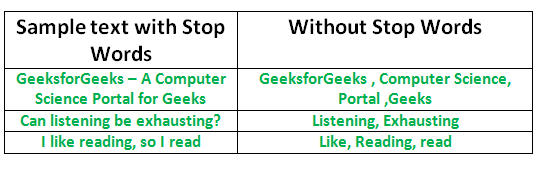

## Metni temizleme

In [8]:
def remove_noise(text):
  
    text = re.sub('@[\w]+','',text)
    text = re.sub('https:\/\/\S+', '', text) # url'leri kaldırma
    text = re.sub('#', '', text) # hashtagleri kaldırma
    text = re.sub('RT[\s]+', '', text) # retweetleri kaldırma
  
    
    text  = "".join([char for char in text if char not in string.punctuation]) #noktalama işaretlerini kaldırma
    text = re.sub('[0-9]+', '', text)
    text = re.sub(emoji.get_emoji_regexp(),r"",text) # emojileri kaldırma
    text = text.lower()
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
   
    return text

df['tweet_cleaned'] = df['tweet'].apply(lambda x: remove_noise(x))

# Tweet'in eski ve yeni hali
df[['tweet','tweet_cleaned']]

,tweet,tweet_cleaned
0,Blockchain's potential: How AI can change the decentralized ledger Artificial intelligence’s tr...,blockchains potential how ai can change the decentralized ledger artificial intelligences trans...
1,Latest Artificial Intelligence In Insurtech Market 2022 | Detailed Report – Indian Defence News ...,latest artificial intelligence in insurtech market detailed report – indian defence news indi...
2,Using Graph-Based Deep Learning to Structure Documents https://t.co/ybASRtnAJB,using graphbased deep learning to structure documents
3,'Nanomagnetic' computing can provide low-energy AI. https://t.co/dLVJKOIylz,nanomagnetic computing can provide lowenergy ai
4,"please fund my startup that will revolutionise agriculture using smart contracts, COBOL and deep...",please fund my startup that will revolutionise agriculture using smart contracts cobol and deep ...
...,...,...
34038,Congratulations to Daniel Galea @galeadaniel1 on a successful viva. His thesis: Meteorological D...,congratulations to daniel galea on a successful viva his thesis meteorological data filtering f...
34039,"Even though much of the focus is on digital twins, artificial intelligence and machines, people ...",even though much of the focus is on digital twins artificial intelligence and machines people ar...
34040,"Privacy bill would set out rules on use of personal data, artificial intelligence https://t.co/...",privacy bill would set out rules on use of personal data artificial intelligence
34041,"Privacy bill would set out rules on use of personal data, artificial intelligence https://t.co/...",privacy bill would set out rules on use of personal data artificial intelligence


In [9]:
df = df.dropna(axis=1) # Eksik değer içeren sütunları kaldırma
df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,tweet,...,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,video,reply_to,tweet_cleaned
0,1538233000361533440,1538233000361533440,2022-06-18 21:51:40 Türkiye Standart Saati,2022-06-18,21:51:40,300,51144918,thecryptorss,Crypto RSS,Blockchain's potential: How AI can change the decentralized ledger Artificial intelligence’s tr...,...,0,0,0,['blockchain'],[],https://twitter.com/TheCryptoRss/status/1538233000361533440,False,1,[],blockchains potential how ai can change the decentralized ledger artificial intelligences trans...
1,1538232968908484608,1538232968908484608,2022-06-18 21:51:33 Türkiye Standart Saati,2022-06-18,21:51:33,300,856240505826496513,suriyasubraman,Suriya Subramanian,Latest Artificial Intelligence In Insurtech Market 2022 | Detailed Report – Indian Defence News ...,...,0,0,0,"['ai', 'artificialintelligence', 'finperform']",[],https://twitter.com/SuriyaSubraman/status/1538232968908484608,False,0,[],latest artificial intelligence in insurtech market detailed report – indian defence news indi...
2,1538232829674508289,1538232829674508289,2022-06-18 21:51:00 Türkiye Standart Saati,2022-06-18,21:51:00,300,1444679582020472833,deepl_tweet,DeepTweet,Using Graph-Based Deep Learning to Structure Documents https://t.co/ybASRtnAJB,...,0,0,0,[],[],https://twitter.com/DeepL_Tweet/status/1538232829674508289,False,0,[],using graphbased deep learning to structure documents
3,1538232615911694338,1538232615911694338,2022-06-18 21:50:09 Türkiye Standart Saati,2022-06-18,21:50:09,300,1119204244542726145,ai_news4,Artificial Intelligence News,'Nanomagnetic' computing can provide low-energy AI. https://t.co/dLVJKOIylz,...,0,0,0,[],[],https://twitter.com/AI_News4/status/1538232615911694338,False,0,[],nanomagnetic computing can provide lowenergy ai
4,1538232473196236803,1538232473196236803,2022-06-18 21:49:35 Türkiye Standart Saati,2022-06-18,21:49:35,300,884364212600000512,fund_my_startup,Fund My Startup,"please fund my startup that will revolutionise agriculture using smart contracts, COBOL and deep...",...,0,0,0,[],[],https://twitter.com/fund_my_startup/status/1538232473196236803,False,0,[],please fund my startup that will revolutionise agriculture using smart contracts cobol and deep ...


In [10]:
df_clean = df[['tweet_cleaned','date','retweets_count','likes_count']]

## TextBlob Aracılığıyla Sentiment Analysis

In [11]:
df_clean["Polarity"] = df_clean["tweet_cleaned"].apply(lambda word: TextBlob(word).sentiment.polarity)
df_clean["Subjectivity"] = df_clean["tweet_cleaned"].apply(lambda word: TextBlob(word).sentiment.subjectivity)
df_clean[["Polarity","Subjectivity"]].head(10)

,Polarity,Subjectivity
0,-0.300000,1.000000
1,0.100000,0.883333
2,0.000000,0.400000
3,0.000000,0.000000
4,0.107143,0.521429
5,-0.300000,0.562500
6,-0.177143,0.628571
7,0.000000,0.000000
8,0.000000,0.400000
9,-0.112500,1.000000


In [12]:
#Polarity değerine göre değerlendirme işlemi
def polarity_analyzer(polarity):
    if polarity > 0:
        return "Positive"
    if polarity == 0:
        return "Neutral"
    if polarity < 0:
        return "Negative"
    
df_clean["Sentiment"] = df_clean["Polarity"].apply(polarity_analyzer)

In [13]:
# Örnek olarak ilk 10 veriyi gösterir
df_clean.head(10)

,tweet_cleaned,date,retweets_count,likes_count,Polarity,Subjectivity,Sentiment
0,blockchains potential how ai can change the decentralized ledger artificial intelligences trans...,2022-06-18,0,0,-0.300000,1.000000,Negative
1,latest artificial intelligence in insurtech market detailed report – indian defence news indi...,2022-06-18,0,0,0.100000,0.883333,Positive
2,using graphbased deep learning to structure documents,2022-06-18,0,0,0.000000,0.400000,Neutral
3,nanomagnetic computing can provide lowenergy ai,2022-06-18,0,0,0.000000,0.000000,Neutral
4,please fund my startup that will revolutionise agriculture using smart contracts cobol and deep ...,2022-06-18,0,0,0.107143,0.521429,Positive
5,the significance of quantum computing for the future of artificial intelligence by dr mehmet yi...,2022-06-18,0,0,-0.300000,0.562500,Negative
6,technology i shocked my mother with an electric car it was current i was dumbfounded by my smart...,2022-06-18,0,0,-0.177143,0.628571,Negative
7,hierarchical clustering machine learning with data reduction in excel r and power bi video tut ...,2022-06-18,0,0,0.000000,0.000000,Neutral
8,current strategy use deep learning potentials to leverage chatbots sustainability,2022-06-18,0,0,0.000000,0.400000,Neutral
9,amaterasus reality by pixeltimmi on a collection of unique hyperrealities created by a custom...,2022-06-18,2,5,-0.112500,1.000000,Negative


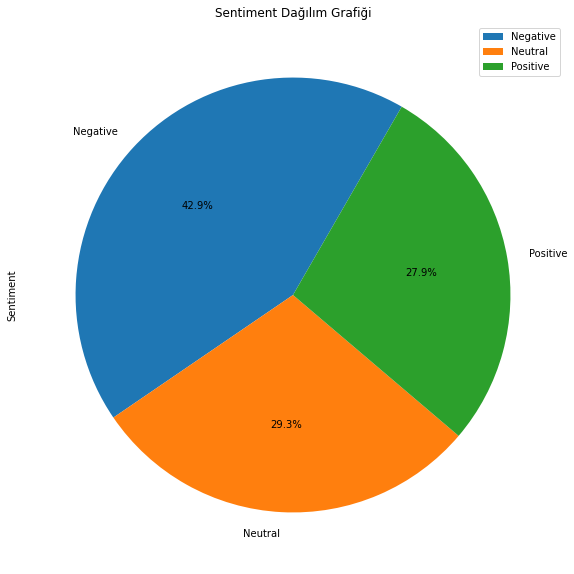

In [14]:
plt.figure(figsize=(10,10))
df_clean['Sentiment'].value_counts().plot.pie(autopct='%1.1f%%', startangle=60)
plt.title('Sentiment Dağılım Grafiği')
plt.legend(loc='upper right')

## Wordcloud Oluşturma

In [15]:
text_positive=df_clean[df_clean['Sentiment']=="Positive"]
text_positive_all = " ".join(review for review in text_positive.tweet_cleaned) # tek bir metin elde edildi

In [16]:
text_negative=df_clean[df_clean['Sentiment']=="Negative"]
text_negative_all = " ".join(review for review in text_negative.tweet_cleaned) # tek bir metin elde edildi

In [17]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

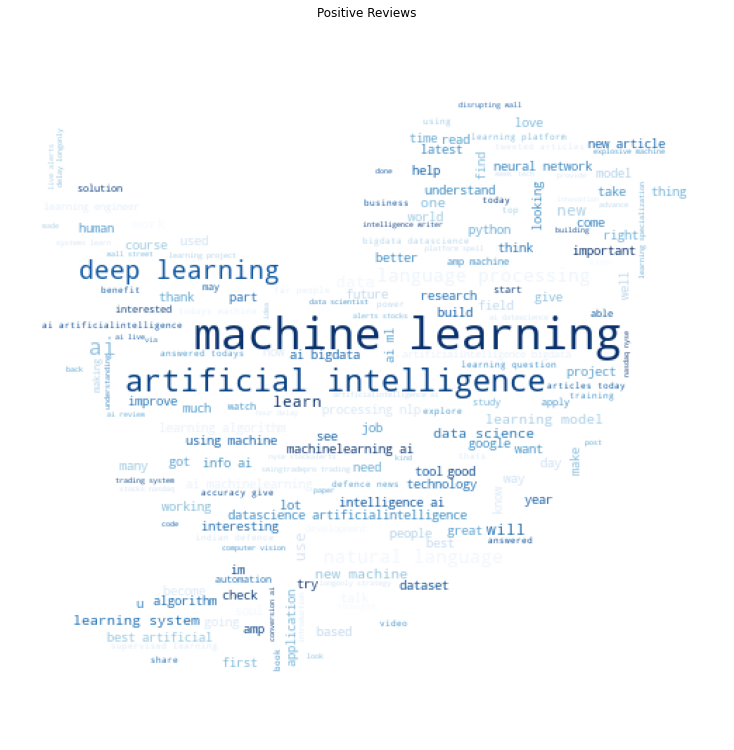

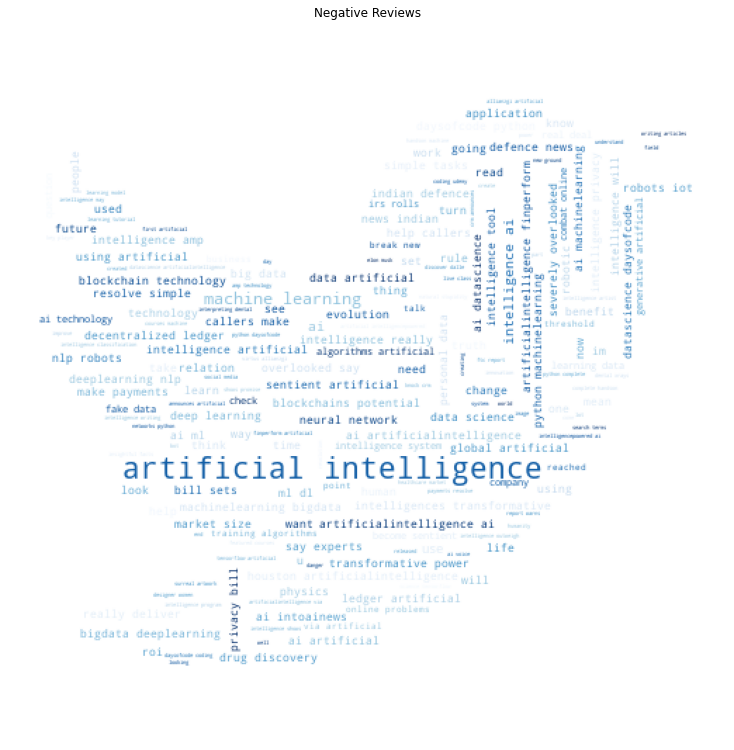

In [18]:
tw_mask = np.array(Image.open("twitter.png"))

wordcloud = WordCloud(contour_width=0, contour_color='Blue',
                background_color ='white', mask = tw_mask , colormap = "Blues", 
                max_words = 5000, normalize_plurals = True)
wordcloud.generate(text_positive_all)
plt.figure(figsize = (20, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('Positive Reviews')
#plt.savefig("twitter.png", dpi=300)
plt.show()
wordcloud.to_file("cloud1.png")


wordcloud.generate(text_negative_all)
plt.figure(figsize = (20, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.title('Negative Reviews')
#plt.savefig("twitter.png", dpi=300)
plt.show()
wordcloud.to_file("cloud2.png")

# PART 2

## Tokenizasyon

In [19]:
from nltk.tokenize import word_tokenize
df_clean['Tweet_tokenized'] = df_clean['tweet_cleaned'].apply(lambda x: word_tokenize(x.lower())) 
df_clean[['Tweet_tokenized','tweet_cleaned']]

,Tweet_tokenized,tweet_cleaned
0,"[blockchains, potential, how, ai, can, change, the, decentralized, ledger, artificial, intellige...",blockchains potential how ai can change the decentralized ledger artificial intelligences trans...
1,"[latest, artificial, intelligence, in, insurtech, market, detailed, report, –, indian, defence, ...",latest artificial intelligence in insurtech market detailed report – indian defence news indi...
2,"[using, graphbased, deep, learning, to, structure, documents]",using graphbased deep learning to structure documents
3,"[nanomagnetic, computing, can, provide, lowenergy, ai]",nanomagnetic computing can provide lowenergy ai
4,"[please, fund, my, startup, that, will, revolutionise, agriculture, using, smart, contracts, cob...",please fund my startup that will revolutionise agriculture using smart contracts cobol and deep ...
...,...,...
34038,"[congratulations, to, daniel, galea, on, a, successful, viva, his, thesis, meteorological, data,...",congratulations to daniel galea on a successful viva his thesis meteorological data filtering f...
34039,"[even, though, much, of, the, focus, is, on, digital, twins, artificial, intelligence, and, mach...",even though much of the focus is on digital twins artificial intelligence and machines people ar...
34040,"[privacy, bill, would, set, out, rules, on, use, of, personal, data, artificial, intelligence]",privacy bill would set out rules on use of personal data artificial intelligence
34041,"[privacy, bill, would, set, out, rules, on, use, of, personal, data, artificial, intelligence]",privacy bill would set out rules on use of personal data artificial intelligence


## Stemming and Lemmatization

In [20]:
from nltk.stem import PorterStemmer, WordNetLemmatizer


In [21]:
"""ps = nltk.PorterStemmer()
# Stemming işlemiyle kelime kökleri bulundu.
def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

df_clean['Tweet_stemmed'] = df_clean['Tweet_tokenized'].apply(lambda x: stemming(x))   
df_clean[['Tweet_stemmed','Tweet_tokenized']]"""

,Tweet_stemmed,Tweet_tokenized
0,"[blockchain, potenti, how, ai, can, chang, the, decentr, ledger, artifici, intellig, transform, ...","[blockchains, potential, how, ai, can, change, the, decentralized, ledger, artificial, intellige..."
1,"[latest, artifici, intellig, in, insurtech, market, detail, report, –, indian, defenc, news, ind...","[latest, artificial, intelligence, in, insurtech, market, detailed, report, –, indian, defence, ..."
2,"[use, graphbas, deep, learn, to, structur, document]","[using, graphbased, deep, learning, to, structure, documents]"
3,"[nanomagnet, comput, can, provid, lowenergi, ai]","[nanomagnetic, computing, can, provide, lowenergy, ai]"
4,"[pleas, fund, my, startup, that, will, revolutionis, agricultur, use, smart, contract, cobol, an...","[please, fund, my, startup, that, will, revolutionise, agriculture, using, smart, contracts, cob..."
...,...,...
34038,"[congratul, to, daniel, galea, on, a, success, viva, hi, thesi, meteorolog, data, filter, for, t...","[congratulations, to, daniel, galea, on, a, successful, viva, his, thesis, meteorological, data,..."
34039,"[even, though, much, of, the, focu, is, on, digit, twin, artifici, intellig, and, machin, peopl,...","[even, though, much, of, the, focus, is, on, digital, twins, artificial, intelligence, and, mach..."
34040,"[privaci, bill, would, set, out, rule, on, use, of, person, data, artifici, intellig]","[privacy, bill, would, set, out, rules, on, use, of, personal, data, artificial, intelligence]"
34041,"[privaci, bill, would, set, out, rule, on, use, of, person, data, artifici, intellig]","[privacy, bill, would, set, out, rules, on, use, of, personal, data, artificial, intelligence]"


### Yorum:
Stemming yöntemini denedik ancak bizim projemizde lemmatization yönteminin daha başarılı sonuç verdiğini gözlemledik.
#### 

In [22]:
lemmatizer= WordNetLemmatizer() 

# lemmatization işlemi uygulandı.

df_clean['Tweet_lemmatized'] = df_clean['Tweet_tokenized'].apply(lambda x:[lemmatizer.lemmatize(j) for j in x] )
df_clean[['Tweet_lemmatized','Tweet_tokenized']]

,Tweet_lemmatized,Tweet_tokenized
0,"[blockchains, potential, how, ai, can, change, the, decentralized, ledger, artificial, intellige...","[blockchains, potential, how, ai, can, change, the, decentralized, ledger, artificial, intellige..."
1,"[latest, artificial, intelligence, in, insurtech, market, detailed, report, –, indian, defence, ...","[latest, artificial, intelligence, in, insurtech, market, detailed, report, –, indian, defence, ..."
2,"[using, graphbased, deep, learning, to, structure, document]","[using, graphbased, deep, learning, to, structure, documents]"
3,"[nanomagnetic, computing, can, provide, lowenergy, ai]","[nanomagnetic, computing, can, provide, lowenergy, ai]"
4,"[please, fund, my, startup, that, will, revolutionise, agriculture, using, smart, contract, cobo...","[please, fund, my, startup, that, will, revolutionise, agriculture, using, smart, contracts, cob..."
...,...,...
34038,"[congratulation, to, daniel, galea, on, a, successful, viva, his, thesis, meteorological, data, ...","[congratulations, to, daniel, galea, on, a, successful, viva, his, thesis, meteorological, data,..."
34039,"[even, though, much, of, the, focus, is, on, digital, twin, artificial, intelligence, and, machi...","[even, though, much, of, the, focus, is, on, digital, twins, artificial, intelligence, and, mach..."
34040,"[privacy, bill, would, set, out, rule, on, use, of, personal, data, artificial, intelligence]","[privacy, bill, would, set, out, rules, on, use, of, personal, data, artificial, intelligence]"
34041,"[privacy, bill, would, set, out, rule, on, use, of, personal, data, artificial, intelligence]","[privacy, bill, would, set, out, rules, on, use, of, personal, data, artificial, intelligence]"


In [23]:
df_clean['cleaned_text'] = df_clean['Tweet_lemmatized'].apply(lambda x: ' '.join(x))
df_clean[['cleaned_text','Tweet_lemmatized']]

,cleaned_text,Tweet_lemmatized
0,blockchains potential how ai can change the decentralized ledger artificial intelligence transfo...,"[blockchains, potential, how, ai, can, change, the, decentralized, ledger, artificial, intellige..."
1,latest artificial intelligence in insurtech market detailed report – indian defence news indian ...,"[latest, artificial, intelligence, in, insurtech, market, detailed, report, –, indian, defence, ..."
2,using graphbased deep learning to structure document,"[using, graphbased, deep, learning, to, structure, document]"
3,nanomagnetic computing can provide lowenergy ai,"[nanomagnetic, computing, can, provide, lowenergy, ai]"
4,please fund my startup that will revolutionise agriculture using smart contract cobol and deep l...,"[please, fund, my, startup, that, will, revolutionise, agriculture, using, smart, contract, cobo..."
...,...,...
34038,congratulation to daniel galea on a successful viva his thesis meteorological data filtering for...,"[congratulation, to, daniel, galea, on, a, successful, viva, his, thesis, meteorological, data, ..."
34039,even though much of the focus is on digital twin artificial intelligence and machine people are ...,"[even, though, much, of, the, focus, is, on, digital, twin, artificial, intelligence, and, machi..."
34040,privacy bill would set out rule on use of personal data artificial intelligence,"[privacy, bill, would, set, out, rule, on, use, of, personal, data, artificial, intelligence]"
34041,privacy bill would set out rule on use of personal data artificial intelligence,"[privacy, bill, would, set, out, rule, on, use, of, personal, data, artificial, intelligence]"


In [32]:
from sklearn.model_selection import train_test_split, cross_val_score

x = df_clean.cleaned_text
y = df_clean['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42 ,stratify = y)

## Vectorization

### Yorum:
Kategorik verileri makine öğrenmesi modeline doğrudan veremediğimiz için veriler üzerinde vektörizasyon işlemini uyguladık ve modele vermek için hazır hale getirdik.
#### 

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

In [26]:
vect = CountVectorizer(lowercase=True, stop_words='english')
x_train_dtm= vect.fit_transform(x_train)
print(x_train_dtm)

  (0, 7943)	1
  (0, 14569)	1
  (0, 12081)	1
  (0, 15680)	1
  (0, 16835)	2
  (0, 13671)	1
  (0, 6470)	1
  (0, 12073)	1
  (0, 16073)	1
  (0, 9832)	2
  (0, 2050)	1
  (0, 6275)	1
  (0, 18943)	1
  (0, 17883)	1
  (0, 892)	1
  (0, 13713)	1
  (0, 15033)	1
  (0, 17060)	1
  (0, 1190)	1
  (0, 9018)	1
  (0, 10341)	1
  (1, 3710)	1
  (1, 18539)	1
  (1, 10675)	1
  (1, 10128)	1
  :	:
  (23827, 4556)	1
  (23827, 11515)	1
  (23827, 11463)	1
  (23827, 126)	1
  (23827, 2098)	1
  (23827, 15361)	1
  (23827, 1997)	1
  (23827, 16091)	1
  (23827, 16723)	1
  (23827, 13345)	1
  (23827, 7550)	1
  (23827, 3568)	1
  (23828, 10675)	1
  (23828, 10128)	1
  (23828, 11515)	1
  (23828, 19338)	1
  (23829, 1190)	1
  (23829, 9018)	1
  (23829, 4390)	1
  (23829, 410)	1
  (23829, 17958)	1
  (23829, 607)	1
  (23829, 4487)	1
  (23829, 6527)	1
  (23829, 14574)	1


In [27]:
tf=pd.DataFrame(x_train_dtm.toarray(),columns=vect.get_feature_names())
tf.head()

,aaa,aaai,aafia,aagard,aai,aaih,aampm,aan,aanbiedt,aangezien,...,𝓗𝓪𝓹𝓹𝓮𝓷𝓲𝓷𝓰,𝓝𝓸𝔀,𝗖𝗼𝗺𝗽𝘂𝘁𝗶𝗻𝗴,𝗘𝗾𝘂𝗮𝗹𝗶𝘁𝘆,𝗚𝗲𝗻𝗱𝗲𝗿,𝗦𝘂𝗺𝗺𝗶𝘁,𝗦𝘂𝗻𝗱𝗮𝘆,𝗧𝗵𝗶𝘀,𝗶𝗻,𝗼𝗻
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Classification

### Yorum:
Kullandığımız modellerin başarı oranlarını birlikte görebilmek ve karşılaştırmak için test_models fonksiyonunu tanımladık. Modellerin test edilmesiyle elde edilen accuracy, precision, recall, f1 değerlerini bir dataframe oluşturarak gösterdik.
#### 

In [28]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.ensemble import RandomForestClassifier
r = RandomForestClassifier()

from sklearn.tree import DecisionTreeClassifier
d = DecisionTreeClassifier()

from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

from sklearn.neighbors import KNeighborsClassifier
k = KNeighborsClassifier()

In [29]:
names=['RandomForestClassifier','DecisionTreeClassifier','LogisticRegression','KNeighborsClassifier']
models=[r, d, log, k]
vect= TfidfVectorizer(ngram_range=(1,2))

In [30]:
def test_models(models,vect,names):

    accuracy = []
    precision = []
    recall = []
    f1 = []
    for i in range(len(models)):
        x_train_dtm = vect.fit_transform(x_train)
        x_test_dtm = vect.transform(x_test)
        nb = models[i]
        nb.fit(x_train_dtm, y_train)
        y_pred_class = nb.predict(x_test_dtm)
        accuracy.append(accuracy_score(y_test, y_pred_class))
        precision.append(precision_score(y_test, y_pred_class, average='micro'))
        recall.append(recall_score(y_test,  y_pred_class, average='micro'))
        f1.append(f1_score(y_test, y_pred_class, average='micro'))
        
    metrics = pd.DataFrame(columns = ['Accuracy', 'Precision', 'Recall', 'F1'], index = names)
    metrics['Accuracy'] = accuracy
    metrics['Precision'] = precision
    metrics['Recall'] = recall
    metrics['F1'] = f1
    return metrics.sort_values('F1', ascending = False)

In [31]:
test_models(models,vect,names)

,Accuracy,Precision,Recall,F1
RandomForestClassifier,0.988250,0.988250,0.988250,0.988250
DecisionTreeClassifier,0.988054,0.988054,0.988054,0.988054
LogisticRegression,0.968667,0.968667,0.968667,0.968667
KNeighborsClassifier,0.631842,0.631842,0.631842,0.631842


### Yorum:
Çıktı aldığımız dataFrame verilerine göre Random Forest Classifier en iyi sonucu vermiştir.
#### 